# Final Project: Preliminary Draft Checkpoint

## Serena Gestring

### December 12, 2022

Material culture is one of the characteristics of humanity that separates us from the rest of the animal kingdom, and this includes the creation of music. It is thought we have been making music for thousands of years, as evidenced by this [~35,000 year old flute](https://humanorigins.si.edu/evidence/behavior/art-music/musical-instruments/ancient-flute). I believe that what we create tells us a lot about ourselves and our species, and so for this project I wanted to compare two different periods of music, Classical and Pop, and see how different or similar they are. 

Classical music actually spans a wide range of music, so I chose to specifically focus on Baroque Classical, which took place between 1600 and 1750, because while researching the characteristics of the different Classical periods, [those of the Baroque](https://www.musicianwave.com/characteristics-of-baroque-music/) were the most intriguing to me (contrast, dynamics, ornamentation). 

Classical music and pop music have [been compared before](https://www.cmuse.org/classical-vs-popular-music/), though it seems like most of the time someone is arguing one is "better" than the other. [Expand on linked source] This is not the goal of this project. I specifically want to compare the Spotify audio features of each music period. As one of the world's largest music streaming services, I thought the data Spotify collects on each track available in their catalog must be valuable (or else they would not bother to collect that data), and so it is this data I would like to examine and see what I find. Essentially, my driving question is this: "How do the Spotify audio features of today's popular music and Baroque Classical music compare, and can this generate some ideas as to how/if humanity's musical tastes/abilities have changed over time?"

[put image here]

To answer this question, I found two playlists on Spotify: [Today's Top Hits](https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M) for current popular music and [Baroque Classics](https://open.spotify.com/playlist/4DvteColbVCrs7iIgc4r6x) for popular music from the Baroque period. While a large sample size is best for performing a better, more thorough, and more complete analysis, due to the timeline of this report I decided to only look at 50 songs from each time period. The Top Hits playlist conveniently has 50 songs. The Baroque Classics playlist has 145 songs. I used a random number generator to give me 50 random track numbers so I could validly collect a sample size from that playlist. 

First I imported all of the packages I would need to perform this analysis in Jupyter Notebook.

In [1]:
import pandas as pd
import json
import requests
import base64
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In order to retrieve the data from my chosen playlists, I needed to access the Spotify API. In order to do that, I needed to provide my developer keys to prove I am authorized to access that information. I uploaded my keys to the Jupyter Notebook anonymously (meaning not visually so it will not be available on the internet).  

In [2]:
keys = pd.read_csv("Spotify_Keys_10-18-22.txt", header = 0, sep = ",")
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]

In [3]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [4]:
response = requests.post(access_token_url, headers = header, data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

Once I had gained access to the Spotify API, I used the Get Playlist Items Endpoint to retrieve the track information for the Top Hits playlist. I printed the status code of the request so I knew that it was successful. 

In [5]:
top_hits_id = '37i9dQZF1DXcBWIGoYBM5M'
playlist_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(top_hits_id)
top_hits_tracks = requests.get(playlist_endpoint, headers = session_header)
print(top_hits_tracks.status_code)

200


In order to get the audio features for each track, I needed the track ids. I loaded the data I retrieved into a pandas data frame, then created another data frame for just the 'track' key in order to more easily look at the track ids.  

In [6]:
top_hits_dict = json.loads(top_hits_tracks.text)
top_hits_df = pd.DataFrame(top_hits_dict['items'])
tracks_df = pd.DataFrame(list(top_hits_df['track']))

I tried alternative ways to combine the track ids into a string, but the way I had done it in a previous assignment was not working, so I went with this method. While listing out all 50 ids is not the most efficient way of doing this, it is still valid code that does what I need it to do. 

Once all of the ids were joined as a string, that string was passed to the Track Features Endpoint in order to retrieve the audio features for the tracks. I printed the status code to make sure the request was successful.  

In [7]:
track_ids1 = ['0V3wPSX9ygBnCm8psDIegu', '3nqQXoyQOWXiESFLlDF1hG', '1xzi1Jcr7mEi9K2RfzLOqS', '4LRPiXqCikLlN15c3yImP7', '0WtM2NBVQNNJLh6scP13H8', '1bDbXMyjaUIooNwFE9wn0N', '73vIOb4Q7YN6HeJTbscRx5', '4uUG5RXrOk84mYEfFvj3cK', '35ovElsgyAtQwYPYnZJECg', '0QHEIqNKsMoOY5urbzN48u']
track_ids2 = ['4h9wh7iOZ0GGn8QVp4RAOB', '5ww2BF9slyYgNOk37BlC4u', '5IgjP7X4th6nMNDh4akUHb', '0O6u0VJ46W86TxN9wgyqDj', '5odlY52u43F5BjByhxg7wg', '5jQI2r1RdgtuT8S3iG8zFC', '1qEmFfgcLObUfQm0j1W2CK', '34ZAzO78a5DAVNrYIGWcPm', '38T0tPVZHcPZyhtOcCP7pF', '26hOm7dTtBi0TdpDGl141t']
track_ids3 = ['1IHWl5LamUGEuP4ozKQSXZ', '4C6Uex2ILwJi9sZXRdmqXp', '76OGwb5RA9h4FxQPT33ekc', '1RDvyOk4WtPCtoqciJwVn8', '0HqZX76SFLDz2aW8aiqi7G', '3WMj8moIAXJhHsyLaqIIHI', '5CM4UuQ9Gnd6K2YyKGPMoK', '0hquQWY3xvYqN4qtiquniF', '4FyesJzVpA39hbYvcseO2d', '1PckUlxKqWQs3RlWXVBLw3']
track_ids4 = ['0mBP9X2gPCuapvpZ7TGDk3', '6G12ZafqofSq7YtrMqUm76', '39JofJHEtg8I4fSyo7Imft', '72yP0DUlWPyH8P7IoxskwN', '2TktkzfozZifbQhXjT6I33', '5unjCay0kUjuej5ebn4nS4', '5HCyWlXZPP0y6Gqq8TgA20', '0T5iIrXA4p5GsubkhuBIKV', '1Ame8XTX6QHY0l0ahqUhgv', '2tTmW7RDtMQtBk7m2rYeSw']
track_ids5 = ['59nOXPmaKlBfGMDeOVGrIK', '37vVp2sWHuuIBOSl1NswP6', '0XER3HPMx223xWaAgNKp4Y', '2rmwqU7yzTvzkiaRV53DpT', '1xK59OXxi2TAAAbmZK0kBL', '5ildQOEKmJuWGl2vRkFdYc', '5hnGrTBaEsdukpDF6aZg8a', '5uSFGgIfHMT3osrAd9n9ym', '3LtpKP5abr2qqjunvjlX5i', '0ARKW62l9uWIDYMZTUmJHF']
top_hits_track_strings = ','.join(str(x) for x in track_ids1+track_ids2+track_ids3+track_ids4+track_ids5)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(top_hits_track_strings)
top_hits_features = requests.get(track_features_endpoint, headers = session_header)
print(top_hits_features.status_code)

200


Then I loaded in the data to a pandas data frame that only displays the audio features. 

In [8]:
top_hits_tracks_dict = json.loads(top_hits_features.text)
top_hits_df = pd.DataFrame(top_hits_tracks_dict['audio_features'])

[put image here]

I repeated this process with the Baroque Classics playlist. 

In [9]:
classic_id = '4DvteColbVCrs7iIgc4r6x'
playlist_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(classic_id)
classic_tracks = requests.get(playlist_endpoint, headers = session_header)
print(classic_tracks.status_code)

200


In [10]:
classic_dict = json.loads(classic_tracks.text)
classic_df = pd.DataFrame(classic_dict['items'])
c_tracks_df = pd.DataFrame(list(classic_df['track']))

As mentioned previously, I used a random number generator to help me pick the 50 tracks from the playlist to look at. Because I am only using random tracks from the data frame, I think this same method for creating the string of ids would have to be used regardless of what I do with the Top Hits data frame; but again, it gets me the information I need. 

In [11]:
ctrack_ids1 = ['68pcPR8jd2djrHAAKYNsw4', '6srU3wlimYXpxBNoCabQGi', '3i8zRjiO3MNaEkrCsp5Ioh', '5S94PIQplSfBHZXsZowyGY', '6P7Ktg9c8YJbgyCqgukEmr', '5FNxBADhe8SM9Aejtw1AfR', '6OWBcTGl5cVn3xBHKrP3fi', '0ka8jmHCpHOiIJm4dgj6MF', '2f3gjXOD5ZdtyjskiT7vdS', '64ZxBE1ZgK4C0lGljXzDcG']
ctrack_ids2 = ['5w7zbR1ZV0Ee7tNFgVROwz', '18JxYMTSFKZlxqdNFrOs1r', '2bahH18wWfRwc073dKyfkT', '5dkKWRisTmeD85NuvNOQHH', '1OjmXxAaUYisbr6wNhyhiP', '267jqHim1E5DzjDfXjM90X', '1SBPeZr2Jy6mwX8X0SE3Cy', '3HEGe9L8HE5r0MQ751BicP', '1Gd0GJF72EJiPFFJYSeDO9', '5bu9A6uphPWg39RC3ZKeku']
ctrack_ids3 = ['5gKa9ap9gLwcCqYSZXkB7x', '2XkKjX6CcG7oQSaID54vjD', '6XgeIl03iqC7W89VmexJ5t', '3613rpwb4iF0gyWFwLWeDC', '5dSsnewB866BdN1aOE64Jk', '0mD1a7haZKdX9I0oPywrMb', '3Bp8T6l1Hc5OlM87U9jtB5', '5mHo72ntBoYSBjfiLiBLUM', '5TyDo6Ay5MN5VPlsPTBMl2', '1Q0YVDfALJ8xRXPsP0nlKg']
ctrack_ids4 = ['3dcKH2hiRBEARnijIF7rFm', '21rKK1lBgAMGqCShuqUyOf', '6jYl96tQY0lsG1tZtACDZx', '57EbM9h0XQG4qiiFUNgZ4W', '5NCVRnVeZk0nvqimk8D1Pt', '1QPRW7vWciCl9lUViiXJPv', '4JncPOVVxWr8Bjkz32bRFu', '6uTCvFRE00RsW3AUf39Evn', '0KHG44mT1UQBsmkZVYCpxp', '2VFWZbQk5XmTtkCkeOFgVo']
ctrack_ids5 = ['3sCGNW7o2uBpzbuUZInsbt', '4wRxPnMfvD1YqbOp9tDO6l', '2NpeOffr2aIpaoXNaXgdsV', '3doapWnT6l06sus63ctRtZ', '2uGkH3hFOydm8C20DoQ0HX', '0TNpryuAtSnygC3hosDGST', '47xdo9qYjAbOIVVBAqom1b', '4KuGb0cwL8KKSySLhS5F3H', '6glOeA1zQhc1plugv0NutP', '5s58LV3A5ytDqGd6Mii2Rp']
classic_track_strings = ','.join(str(x) for x in ctrack_ids1+ctrack_ids2+ctrack_ids3+ctrack_ids4+ctrack_ids5)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(classic_track_strings)
classic_features = requests.get(track_features_endpoint, headers = session_header)
print(classic_features.status_code)

200


In [12]:
classic_tracks_dict = json.loads(classic_features.text)
classic_df = pd.DataFrame(classic_tracks_dict['audio_features'])

Finally, I join the two data frames together using the concat() method. The first five and last five items in the data frame are displayed. 

In [13]:
final_df = pd.concat([top_hits_df, classic_df])
final_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4
1,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4
2,0.780,0.689,7,-5.668,1,0.1410,0.0368,0.000010,0.0698,0.642,115.042,audio_features,1xzi1Jcr7mEi9K2RfzLOqS,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,https://api.spotify.com/v1/tracks/1xzi1Jcr7mEi...,https://api.spotify.com/v1/audio-analysis/1xzi...,225389,4
3,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4
4,0.801,0.806,11,-5.206,1,0.0381,0.3820,0.000669,0.1140,0.802,106.999,audio_features,0WtM2NBVQNNJLh6scP13H8,spotify:track:0WtM2NBVQNNJLh6scP13H8,https://api.spotify.com/v1/tracks/0WtM2NBVQNNJ...,https://api.spotify.com/v1/audio-analysis/0WtM...,239318,4


In [14]:
final_df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
45,0.1030,0.1230,3,-16.964,0,0.0519,0.875,0.000008,0.110,0.0983,48.742,audio_features,0TNpryuAtSnygC3hosDGST,spotify:track:0TNpryuAtSnygC3hosDGST,https://api.spotify.com/v1/tracks/0TNpryuAtSny...,https://api.spotify.com/v1/audio-analysis/0TNp...,154267,4
46,0.1390,0.1100,0,-16.155,0,0.0362,0.453,0.902000,0.107,0.0377,174.865,audio_features,47xdo9qYjAbOIVVBAqom1b,spotify:track:47xdo9qYjAbOIVVBAqom1b,https://api.spotify.com/v1/tracks/47xdo9qYjAbO...,https://api.spotify.com/v1/audio-analysis/47xd...,300213,3
47,0.3800,0.0842,4,-30.289,0,0.0402,0.994,0.841000,0.129,0.5320,144.768,audio_features,4KuGb0cwL8KKSySLhS5F3H,spotify:track:4KuGb0cwL8KKSySLhS5F3H,https://api.spotify.com/v1/tracks/4KuGb0cwL8KK...,https://api.spotify.com/v1/audio-analysis/4KuG...,109720,4
48,0.4390,0.1340,5,-21.685,0,0.0508,0.756,0.280000,0.235,0.3770,154.098,audio_features,6glOeA1zQhc1plugv0NutP,spotify:track:6glOeA1zQhc1plugv0NutP,https://api.spotify.com/v1/tracks/6glOeA1zQhc1...,https://api.spotify.com/v1/audio-analysis/6glO...,209333,4
49,0.0983,0.0953,2,-22.250,1,0.0503,0.971,0.773000,0.108,0.1140,171.034,audio_features,5s58LV3A5ytDqGd6Mii2Rp,spotify:track:5s58LV3A5ytDqGd6Mii2Rp,https://api.spotify.com/v1/tracks/5s58LV3A5ytD...,https://api.spotify.com/v1/audio-analysis/5s58...,269347,1


[insert image here]

*Explain what you did (how was the data cleaned/changed, what analysis was conducted and why?)*

To reiterate, I want to analyze the similarities and differences between the audio features of this Baroque Classical playlist and this Top Hits playlist. To my knowledge, no one has done this type of analysis using specifically Spotify data before (that I could find), so I want to see if anything can be gleaned from this examination of Spotify data. 

To start this analysis, I created visualizations for the [different variables for which Spotify collects data](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features). Some of the variables are set data values, meaning they are not based on algorithms but are based off the track itself. These include key signature, modality, tempo, loudness, and track duration. The rest of the variables I looked at, to my understanding, are based on algorithms created by Spotify in order to generate a value for each variable. These include danceability, energy, speechiness, acousticness, instrumentalness, liveness, and valence.

For example, we cannot measure "danceability" like we can measure track duration, because the latter is measured using a standard unit of time. There is no standard measurement for something like danceability, so Spotify had to create their own by which to measure.  

### 1. Danceability

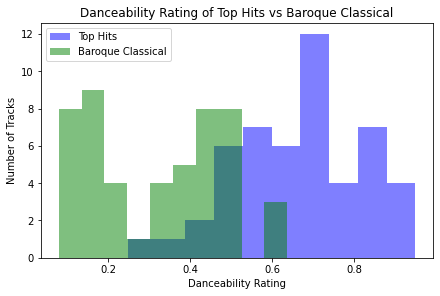

In [15]:
fig1, ax1 = plt.subplots(layout = 'constrained')
th_dance = top_hits_df['danceability']
bc_dance = classic_df['danceability']
ax1.hist(th_dance, alpha = 0.5, color = 'blue', label = 'Top Hits')
ax1.hist(bc_dance, alpha = 0.5, color = 'green', label = 'Baroque Classical')
ax1.legend()
ax1.set_xlabel('Danceability Rating')
ax1.set_ylabel('Number of Tracks')
ax1.set_title('Danceability Rating of Top Hits vs Baroque Classical')
plt.show()

Spotify defines danceability as "how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity." I do not believe it is surprising to see that tracks from the Top Hits playlist generally have a higher danceability compared to tracks from the Baroque Classical playlist, though there are 3 songs from the latter playlist that have a moderately high danceability rating of around 0.6, so that is an interesting find. 

### 2. Energy

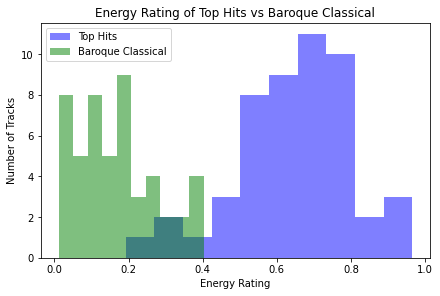

In [16]:
fig2, ax2 = plt.subplots(layout = 'constrained')
th_energy = top_hits_df['energy']
bc_energy = classic_df['energy']
ax2.hist(th_energy, alpha = 0.5, color = 'blue', label = 'Top Hits')
ax2.hist(bc_energy, alpha = 0.5, color = 'green', label = 'Baroque Classical')
ax2.legend()
ax2.set_xlabel('Energy Rating')
ax2.set_ylabel('Number of Tracks')
ax2.set_title('Energy Rating of Top Hits vs Baroque Classical')
plt.show()

Energy is meant to represent the intensity and activity of a track on a scale from 0.0 to 1.0 where 0 is lowest energy and 1 is highest energy. Again, it is not surprising to see that nearly all of the tracks from the Top Hits playlist have a higher intensity than nearly all of the tracks on the Baroque Classical playlist. 

### 3. Speechiness

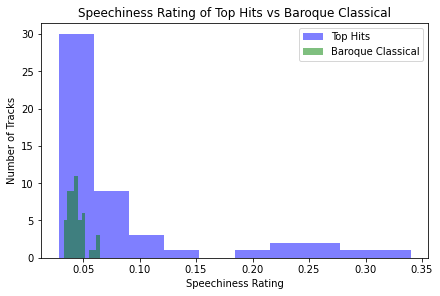

In [17]:
fig3, ax3 = plt.subplots(layout = 'constrained')
th_speech = top_hits_df['speechiness']
bc_speech = classic_df['speechiness']
ax3.hist(th_speech, alpha = 0.5, color = 'blue', label = 'Top Hits')
ax3.hist(bc_speech, alpha = 0.5, color = 'green', label = 'Baroque Classical')
ax3.legend()
ax3.set_xlabel('Speechiness Rating')
ax3.set_ylabel('Number of Tracks')
ax3.set_title('Speechiness Rating of Top Hits vs Baroque Classical')
plt.show()

Speechiness "detects the presence of spoken words" within a track. A speechiness rating above 0.66 means the track is likely only comprised of spoken words; a rating between 0.33 and 0.66 means the track likely contains both music and speech; and a rating under 0.33 is means the track likely has no spoken words and only music/non-speech sounds. Spotify does not clarify if singing constitutes as "non-speech," but based on the above graph, I would say it does because all 100 tracks are below 0.35. 

I am not surprised to see the Baroque Classical tracks at the very low end of the speechiness rating, though I was surprised to see how many pop songs were also near the low end (but that could have been due to my misunderstanding of how singing would be classified). Based on this, I am goinig to guess one of the speechiest if not the speechiest genre of music is rap (this would of course need looked into with its own data set). 

### 4. Acousticness

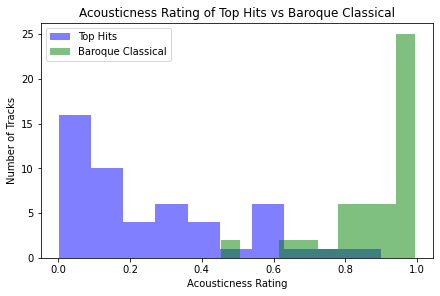

In [18]:
fig4, ax4 = plt.subplots(layout = 'constrained')
th_acoustic = top_hits_df['acousticness']
bc_acoustic = classic_df['acousticness']
ax4.hist(th_acoustic, alpha = 0.5, color = 'blue', label = 'Top Hits')
ax4.hist(bc_acoustic, alpha = 0.5, color = 'green', label = 'Baroque Classical')
ax4.legend()
ax4.set_xlabel('Acousticness Rating')
ax4.set_ylabel('Number of Tracks')
ax4.set_title('Acousticness Rating of Top Hits vs Baroque Classical')
plt.show()

The acousticness rating is "a confidence measure from 0.0 to 1.0 of whether the track is acoustic." A rating of 1.0 represents high confidence the track is acoustic, and a rating of 0.0 represents a low confidence that the track is acoustic. Most Top Hits tracks rated a low acousticness, though there are some moderate ratings, and nearly all Baroque Classical rated very high acousticness, with a couple low exceptions ranging from ~0.5 to ~0.7. This makes sense because Baroque Classical music would have only been comprised of acoustic instruments since digital instruments did not exist during that time period, while today using digital technology in the production of music is common. 

### 5. Instrumentalness

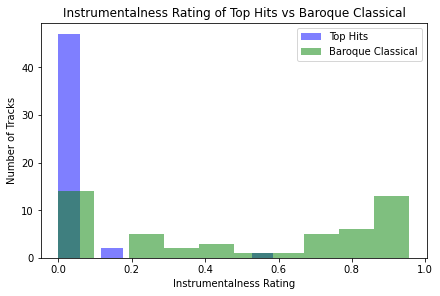

In [19]:
fig5, ax5 = plt.subplots(layout = 'constrained')
th_instrum = top_hits_df['instrumentalness']
bc_instrum = classic_df['instrumentalness']
ax5.hist(th_instrum, alpha = 0.5, color = 'blue', label = 'Top Hits')
ax5.hist(bc_instrum, alpha = 0.5, color = 'green', label = 'Baroque Classical')
ax5.legend()
ax5.set_xlabel('Instrumentalness Rating')
ax5.set_ylabel('Number of Tracks')
ax5.set_title('Instrumentalness Rating of Top Hits vs Baroque Classical')
plt.show()

The instrumentalness rating "predicts whether a track contains no vocals." The closer to 1.0, the greater the likelihood that the track contains no vocal content, and the closer to 0.0, the greater the likelihood that the  track contains a lot of vocal content; therefore, ratings above 0.5 typically represent instrumental tracks. It is once again not surprising to see that all of the Top Hits tracks have incredibly low instrumentalness ratings. However, there are more Baroque Classical tracks below 0.5 than I was expecting; it actually has a decent spread and is bimodal, with the two modes on opposite sides of the scale. 

### 6. Valence

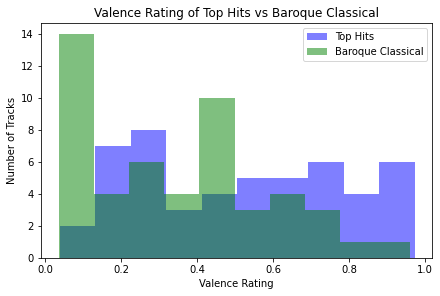

In [20]:
fig6, ax6 = plt.subplots(layout = 'constrained')
th_valence = top_hits_df['valence']
bc_valence = classic_df['valence']
ax6.hist(th_valence, alpha = 0.5, color = 'blue', label = 'Top Hits')
ax6.hist(bc_valence, alpha = 0.5, color = 'green', label = 'Baroque Classical')
ax6.legend()
ax6.set_xlabel('Valence Rating')
ax6.set_ylabel('Number of Tracks')
ax6.set_title('Valence Rating of Top Hits vs Baroque Classical')
plt.show()

Valence is "a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track." Tracks with a higher valence are more positive, happy, cheerful; tracks with a lower valence are more negative, sadder, and angrier. Out of all the data visualizations in this report, I was most surprised by this one. I was not expecting the tracks of Baroque Classical to be so spread, and definitely not for that playlist to have the highest number of least-positive songs. In contrast, The Top Hits playlist has the highest number of most-positive songs, but it also has a decent spread. This tells me that humans have been using music to express our wide range of emotions for a long time. 

[put image here]

### 7. Liveness

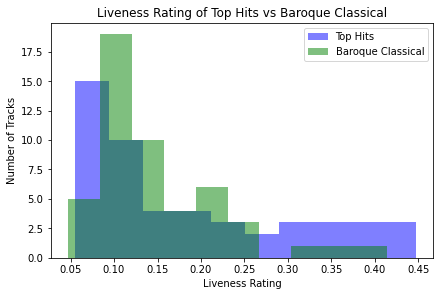

In [21]:
fig7, ax7 = plt.subplots(layout = 'constrained')
th_live = top_hits_df['liveness']
bc_live = classic_df['liveness']
ax7.hist(th_live, alpha = 0.5, color = 'blue', label = 'Top Hits')
ax7.hist(bc_live, alpha = 0.5, color = 'green', label = 'Baroque Classical')
ax7.legend()
ax7.set_xlabel('Liveness Rating')
ax7.set_ylabel('Number of Tracks')
ax7.set_title('Liveness Rating of Top Hits vs Baroque Classical')
plt.show()

The liveness rating "detects the presence of an audience in the recording." This means that a higher liveness rating means a higher probability that the track was recorded live. All 100 tracks are below a 0.5 rating, so I believe the probability is low that any of these were recorded live, especially since most of the ratings seem to be below 0.25. 

### 8. Loudness

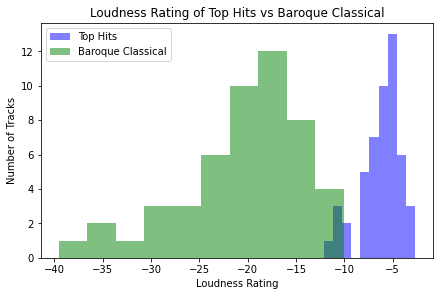

In [22]:
fig8, ax8 = plt.subplots(layout = 'constrained')
th_loud = top_hits_df['loudness']
bc_loud = classic_df['loudness']
ax8.hist(th_loud, alpha = 0.5, color = 'blue', label = 'Top Hits')
ax8.hist(bc_loud, alpha = 0.5, color = 'green', label = 'Baroque Classical')
ax8.legend()
ax8.set_xlabel('Loudness Rating')
ax8.set_ylabel('Number of Tracks')
ax8.set_title('Loudness Rating of Top Hits vs Baroque Classical')
plt.show()

The loudness rating refers to "the overall loudness of a track in decibels (dB)," or the "quality of a sound that is the primary psychological correlate of physical strength (amplitude)." According to Spotify, loudness ratings are typically between -60 and 0 dB, and all tracks from both playlists fall in this range. Based on my understanding of [decibels](https://www.scienceabc.com/pure-sciences/why-negative-decibels-are-a-thing.html), I believe the closer-to-0 values are louder and the farther-from-0 values are quieter. Therefore, Baroque Classical seems to be softer than the Top Hits and has a wider spread. 

### 9. Track Duration

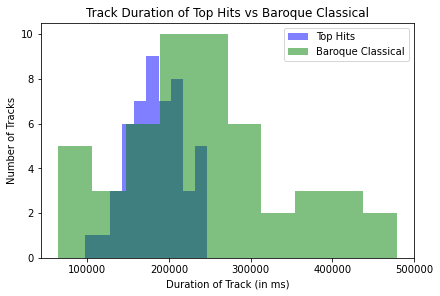

In [23]:
fig9, ax9 = plt.subplots(layout = 'constrained')
th_dura = top_hits_df['duration_ms']
bc_dura = classic_df['duration_ms']
ax9.hist(th_dura, alpha = 0.5, color = 'blue', label = 'Top Hits')
ax9.hist(bc_dura, alpha = 0.5, color = 'green', label = 'Baroque Classical')
ax9.legend()
ax9.set_xlabel('Duration of Track (in ms)')
ax9.set_ylabel('Number of Tracks')
ax9.set_title('Track Duration of Top Hits vs Baroque Classical')
plt.show()

This graph visualizes the duration of track (or how long the song is) in milliseconds (so 100,000 milliseconds is 100 seconds, or a minute and 40 seconds). Baroque Classical tracks have a much wider spread and tend to be longer compared to Top Hits tracks. This could have to do with current pop being played on radio stations that could require a time limit for various reasons. 

### 10. Tempo

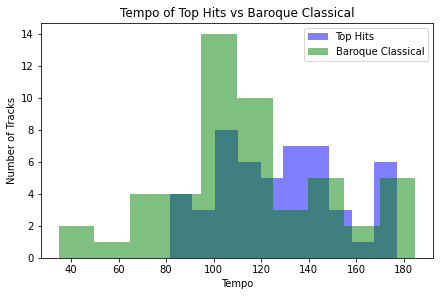

In [24]:
fig10, ax10 = plt.subplots(layout = 'constrained')
th_tempo = top_hits_df['tempo']
bc_tempo = classic_df['tempo']
ax10.hist(th_tempo, alpha = 0.5, color = 'blue', label = 'Top Hits')
ax10.hist(bc_tempo, alpha = 0.5, color = 'green', label = 'Baroque Classical')
ax10.legend()
ax10.set_xlabel('Tempo')
ax10.set_ylabel('Number of Tracks')
ax10.set_title('Tempo of Top Hits vs Baroque Classical')
plt.show()

In this case the tempo value refers to "the overall estimated tempo of a track in beats per minute (BPM)," and tempo is the speed of a given piece of music. The Baroque Classical has a wider spread as well as some of the slowest songs out of the sample. The Top Hits has a more narrower spread and is on the faster side of the scale. Interestingly, both playlists seem to peak around the same value of about 100 to 110. 

### 11. Key Signature

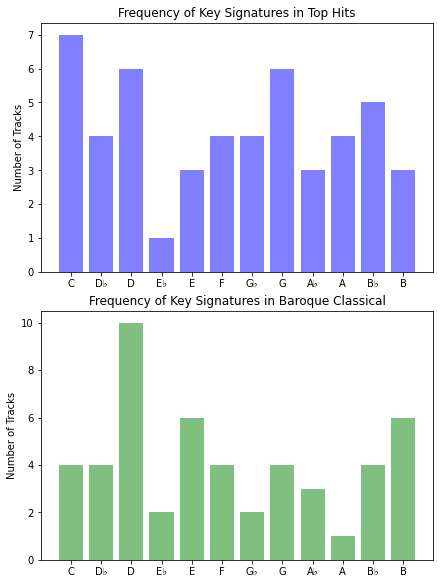

In [26]:
fig11, ax11 = plt.subplots(2, 1, layout = 'constrained')
fig11.set_figheight(8)
th_key = top_hits_df.groupby('key').count()['id']
bc_key = classic_df.groupby('key').count()['id']
labels = ['C', 'D♭', 'D', 'E♭', 'E', 'F', 'G♭', 'G', 'A♭', 'A', 'B♭', 'B']
ax11[0].bar(labels, th_key, alpha = 0.5, color = 'blue')
ax11[1].bar(labels, bc_key, alpha = 0.5, color = 'green')
ax11[0].set_ylabel('Number of Tracks')
ax11[0].set_title('Frequency of Key Signatures in Top Hits')
ax11[1].set_ylabel('Number of Tracks')
ax11[1].set_title('Frequency of Key Signatures in Baroque Classical')
plt.show()

In the data frame, Spotify assigns a number to signify which key the track is in, and this number is associated with the key's [Pitch Class](https://en.wikipedia.org/wiki/Pitch_class) (meaning each key already has a number associated with it). Therefore, instead of labeling the x-axis with the numbers in the data frame, I was able to label them with their associated key, which would make the graph easier to understand. 

The most popular keys of the Top Hits playlist are C, D and G, and B-flat. The most popular keys of the Baroque Classical playlist are D (by a relatively decent number), B, and E. E-flat is not popular in either playlist. This by itself does not say much, but if we were to compare the keys used for several musical time periods, I think we could learn more.   

### 12. Mode

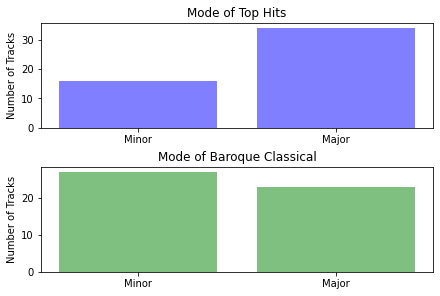

In [26]:
fig12, ax12 = plt.subplots(2, 1, layout = 'constrained')
th_mode = top_hits_df.groupby('mode').count()['id']
bc_mode = classic_df.groupby('mode').count()['id']
labels = ['Minor', 'Major']
ax12[0].bar(labels, th_mode, alpha = 0.5, color = 'blue')
ax12[1].bar(labels, bc_mode, alpha = 0.5, color = 'green')
ax12[0].set_ylabel('Number of Tracks')
ax12[0].set_title('Mode of Top Hits')
ax12[1].set_ylabel('Number of Tracks')
ax12[1].set_title('Mode of Baroque Classical')
plt.show()

The mode refers to the modality of a track, or whether the track is in a minor key or a major key. Major is represented by the number 1 and minor is represented by 0. Clearly, Top Hits has more major tracks, and Baroque Classical has more minor tracks. 

After creating this visualization of mode, I thought about looking at mode in relation to valence because I was under the impression that major keys tended to sound happier and minor keys tended to sound sadder, so I wanted to see if that correlated with the valence of the tracks. 

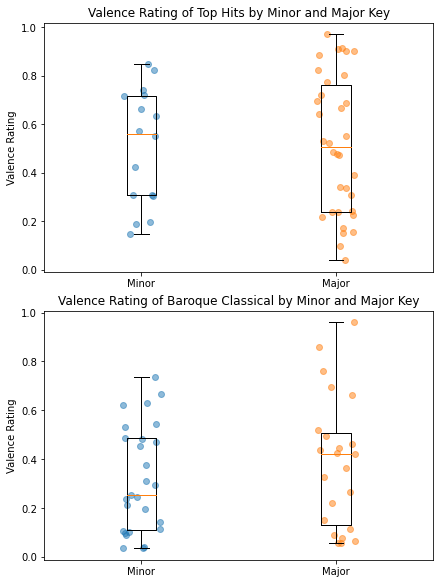

In [36]:
fig13, ax13 = plt.subplots(2, 1, layout = 'constrained')
fig13.set_figheight(8)
th_minor_val = top_hits_df[top_hits_df['mode'] == 0]['valence']
th_major_val = top_hits_df[top_hits_df['mode'] == 1]['valence']
th_minor_x = [1] * len(th_minor_val)
th_major_x = [2] * len(th_major_val)
th_minor_x_jitter = np.random.uniform(-0.10, 0.10, len(th_minor_x))
th_major_x_jitter = np.random.uniform(-0.10, 0.10, len(th_major_x))
ax13[0].scatter(th_minor_x + th_minor_x_jitter, th_minor_val, alpha = 0.5)
ax13[0].scatter(th_major_x + th_major_x_jitter, th_major_val, alpha = 0.5)
ax13[0].boxplot([th_minor_val, th_major_val])
ax13[0].set_xticks([1,2], ['Minor', 'Major'])
ax13[0].set_ylabel('Valence Rating')
ax13[0].set_title('Valence Rating of Top Hits by Minor and Major Key')
bc_minor_val = classic_df[classic_df['mode'] == 0]['valence']
bc_major_val = classic_df[classic_df['mode'] == 1]['valence']
bc_minor_x = [1] * len(bc_minor_val)
bc_major_x = [2] * len(bc_major_val)
bc_minor_x_jitter = np.random.uniform(-0.10, 0.10, len(bc_minor_x))
bc_major_x_jitter = np.random.uniform(-0.10, 0.10, len(bc_major_x))
ax13[1].scatter(bc_minor_x + bc_minor_x_jitter, bc_minor_val, alpha = 0.5)
ax13[1].scatter(bc_major_x + bc_major_x_jitter, bc_major_val, alpha = 0.5)
ax13[1].boxplot([bc_minor_val, bc_major_val])
ax13[1].set_xticks([1,2], ['Minor', 'Major'])
ax13[1].set_ylabel('Valence Rating')
ax13[1].set_title('Valence Rating of Baroque Classical by Minor and Major Key')
plt.show()

Based on the above graph, it does not seem like there is a relationship between modality and valence. Both playlists have major tracks that range from high valence to low valence, so both positive and negative, and the same idea goes for the minor tracks of both playlists, though the minor Baroque Classical tracks seem to be a little more concentrated on the low side of valence.  

[put image here]

[analysis: Explain what the results mean (what have you learned, what new questions need to be asked] - EXPAND

- Dance: opposite
- energy: opposite
- speechiness: ? similar-ish but bc so infantesimal 
- acoustic: kinda opposite, and least opposite extremes
- instrument: ? almost no spread vs lots spread
- valence: similar-ish in that lots of spread
- liveness: similar-ish in that low
- loudness: ? low spread vs wide spread
- duration: bc tends to be longer? wider spread
- tempo: seems pretty similar spread, bc a little more slower
- key: not much to glean from this, would need more data to get a better picture
- mode: opposite


[conclusion: Explain your conclusion (what should your audience take away from the report?), limitations, and next steps]

This is just a one small piece of a larger puzzle examining the evolution of music. From such a small sample size, no concrete conclusions can be made about Classical vs. Pop music in general. A next step could be to separate the history of music into chunks of time and compare each chunk, regardless of music genre, to see what kind of music humans were creating at that time. 